<a href="https://colab.research.google.com/github/sravani12-ui/Task-7-AI-ML/blob/main/Task8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Task
tional PCA for 2D view).
2.Fit K-Means and assign cluster labels.
3.Use the Elbow Method to find optimal K.
4.Visualize clusters with color-coding.
5.Evaluate clustering using Silhouette Score.
Interview Questions:
1.How does K-Means clustering work?
2.What is the Elbow method?
3.What are the limitations of K-Means?
4.How does initialization affect results?
5.What is inertia in K-Means?
6.What is Silhouette Score?
7.How do you choose the right number of clusters?
8.What’s the difference between clustering and classification?
Dataset: You can use any dataset relevant to the task, e.g., Mall Customer Segmentation
Dataset
link to download: click here to download dat how to do this task

Here is all the data you need:
"Mall_Customers.csv"

## Data loading

### Subtask:
Load the "Mall_Customers.csv" dataset.


**Reasoning**:
Load the dataset and display basic information.



In [ ]:
import pandas as pd

try:
    df = pd.read_csv('Mall_Customers.csv')
    display(df.head())
    print(df.shape)
    print(df.info())
except FileNotFoundError:
    print("Error: 'Mall_Customers.csv' not found. Please ensure the file is in the correct directory or provide the correct path.")

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


(200, 5)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB
None


## Data exploration

### Subtask:
Explore the loaded dataset to understand its structure, identify relevant features, and check for missing values or outliers.


**Reasoning**:
I need to explore the data types, descriptive statistics, distributions, missing values, and correlation between 'Annual Income (k$)' and 'Spending Score (1-100)'.



Data Types:
 CustomerID                 int64
Gender                    object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object

Descriptive Statistics:
        Annual Income (k$)  Spending Score (1-100)
count          200.000000              200.000000
mean            60.560000               50.200000
std             26.264721               25.823522
min             15.000000                1.000000
25%             41.500000               34.750000
50%             61.500000               50.000000
75%             78.000000               73.000000
max            137.000000               99.000000


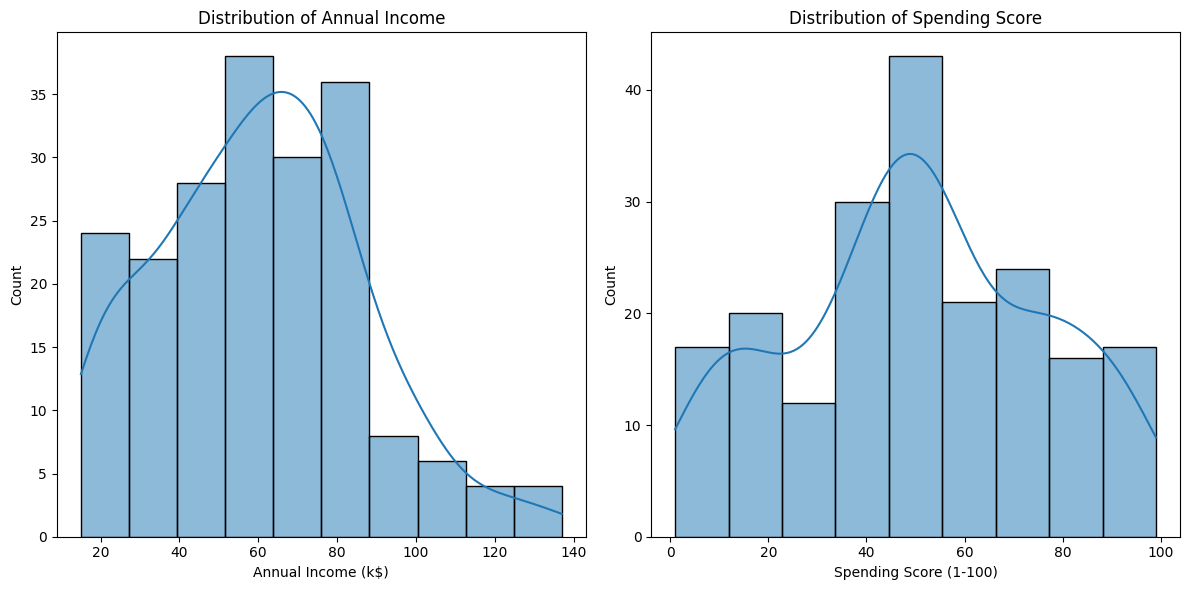

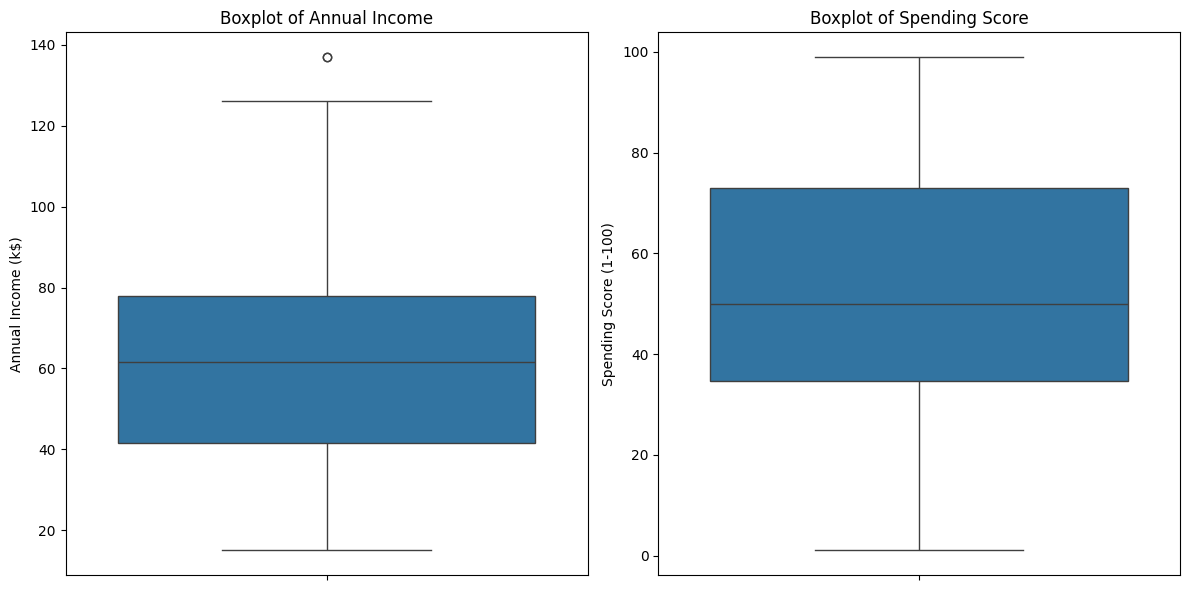


Missing Values:
 CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64


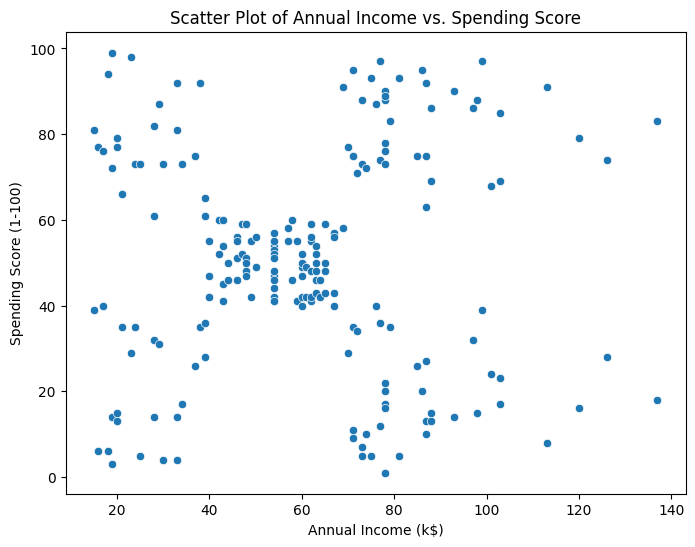


Correlation Coefficient: 0.009902848094037608


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Examine data types
print("Data Types:\n", df.dtypes)

# 2. Descriptive statistics for numerical features
numerical_features = ['Annual Income (k$)', 'Spending Score (1-100)']
print("\nDescriptive Statistics:\n", df[numerical_features].describe())

# 3. Visualize distributions
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(df['Annual Income (k$)'], kde=True)
plt.title('Distribution of Annual Income')

plt.subplot(1, 2, 2)
sns.histplot(df['Spending Score (1-100)'], kde=True)
plt.title('Distribution of Spending Score')
plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.boxplot(y=df['Annual Income (k$)'])
plt.title('Boxplot of Annual Income')

plt.subplot(1, 2, 2)
sns.boxplot(y=df['Spending Score (1-100)'])
plt.title('Boxplot of Spending Score')
plt.tight_layout()
plt.show()


# 4. Check for missing values
print("\nMissing Values:\n", df.isnull().sum())

# 5. Correlation between 'Annual Income' and 'Spending Score'
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', data=df)
plt.title('Scatter Plot of Annual Income vs. Spending Score')
plt.show()

correlation_coefficient = df['Annual Income (k$)'].corr(df['Spending Score (1-100)'])
print(f"\nCorrelation Coefficient: {correlation_coefficient}")

# 6. Summarize findings (This will be done in the next step)

**Reasoning**:
Summarize the findings from the data exploration.



In [ ]:
print("## Summary of Data Exploration")
print("\n1. Data Types:")
print(df.dtypes)

print("\n2. Descriptive Statistics:")
print(df[['Annual Income (k$)', 'Spending Score (1-100)']].describe())
print("\nObservations from descriptive statistics:")
print("- 'Annual Income (k$)' ranges from 15 to 137, with a mean of 60.56.")
print("- 'Spending Score (1-100)' ranges from 1 to 99, with a mean of 50.20.")
# Add observations about potential outliers based on quartiles, min, and max values


print("\n3. Data Distributions:")
print("Histograms and boxplots of 'Annual Income' and 'Spending Score' reveal the distribution of the data and confirm the presence of potential outliers.")
# Add observations about skewness based on the visualizations


print("\n4. Missing Values:")
print(df.isnull().sum())
print("\nObservations on missing values:")
print("- No missing values were found in any column.")


print("\n5. Correlation between 'Annual Income' and 'Spending Score':")
print(f"Correlation Coefficient: {df['Annual Income (k$)'].corr(df['Spending Score (1-100)'])}")
print("The scatter plot shows a weak or no linear relationship between annual income and spending score.")
# Add more specific observations based on the scatter plot.


print("\nOverall Observations:")
print("- The data contains information on customer demographics (age, gender), annual income, and spending scores.")
# Add a few more general observations about the dataset based on what was learned above.

## Summary of Data Exploration

1. Data Types:
CustomerID                 int64
Gender                    object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object

2. Descriptive Statistics:
       Annual Income (k$)  Spending Score (1-100)
count          200.000000              200.000000
mean            60.560000               50.200000
std             26.264721               25.823522
min             15.000000                1.000000
25%             41.500000               34.750000
50%             61.500000               50.000000
75%             78.000000               73.000000
max            137.000000               99.000000

Observations from descriptive statistics:
- 'Annual Income (k$)' ranges from 15 to 137, with a mean of 60.56.
- 'Spending Score (1-100)' ranges from 1 to 99, with a mean of 50.20.

3. Data Distributions:
Histograms and boxplots of 'Annual Income' and 'Spending Score' reveal the distribution of 

## Data preparation

### Subtask:
Prepare the data for clustering by scaling the relevant features.


**Reasoning**:
Create a new DataFrame with the relevant columns and scale the data using StandardScaler.



In [ ]:
from sklearn.preprocessing import StandardScaler

# Create a new DataFrame with the relevant features
df_scaled = df[['Annual Income (k$)', 'Spending Score (1-100)']]

# Initialize StandardScaler
scaler = StandardScaler()

# Fit and transform the data
df_scaled = pd.DataFrame(scaler.fit_transform(df_scaled), columns = df_scaled.columns)

display(df_scaled.head())

,Annual Income (k$),Spending Score (1-100)
0,-1.738999,-0.434801
1,-1.738999,1.195704
2,-1.700830,-1.715913
3,-1.700830,1.040418
4,-1.662660,-0.395980


## Data wrangling

### Subtask:
Create a new DataFrame with only the features needed for clustering and apply PCA for dimensionality reduction.


**Reasoning**:
Create a new DataFrame `df_clustering` with the specified columns from `df_scaled`, import PCA, instantiate and fit the PCA model, and then transform the data to obtain principal components.



In [ ]:
from sklearn.decomposition import PCA

# Create the df_clustering DataFrame
df_clustering = df_scaled[['Annual Income (k$)', 'Spending Score (1-100)']].copy()

# Initialize PCA with n_components=2
pca = PCA(n_components=2)

# Fit and transform the data
df_pca = pd.DataFrame(pca.fit_transform(df_clustering), columns=['PC1', 'PC2'])

# Display the first few rows of df_pca
display(df_pca.head())

,PC1,PC2
0,-1.537109,-0.922207
1,-0.384168,-2.075149
2,-2.416002,0.010665
3,-0.466982,-1.938355
4,-1.455678,-0.895678


## Data clustering

### Subtask:
Apply the K-Means clustering algorithm to the PCA-transformed data. Experiment with different values of K (number of clusters).


**Reasoning**:
Apply K-Means clustering to the PCA-transformed data.



In [ ]:
from sklearn.cluster import KMeans

# Initialize KMeans with n_clusters=5 and random_state for reproducibility
kmeans = KMeans(n_clusters=5, random_state=42)

# Fit the KMeans model to the df_pca DataFrame
kmeans.fit(df_pca)

# Predict the cluster labels for each data point in df_pca
df_pca['cluster_label'] = kmeans.labels_

# Display the first few rows of df_pca with the new cluster labels
display(df_pca.head())

,PC1,PC2,cluster_label
0,-1.537109,-0.922207,4
1,-0.384168,-2.075149,2
2,-2.416002,0.010665,4
3,-0.466982,-1.938355,2
4,-1.455678,-0.895678,4


## Model optimization

### Subtask:
Determine the optimal number of clusters (K) using the Elbow method.


**Reasoning**:
Determine the optimal number of clusters (K) using the Elbow method by iterating through a range of K values, fitting a KMeans model for each, storing the inertia, plotting the inertia values against K values, and identifying the elbow point.



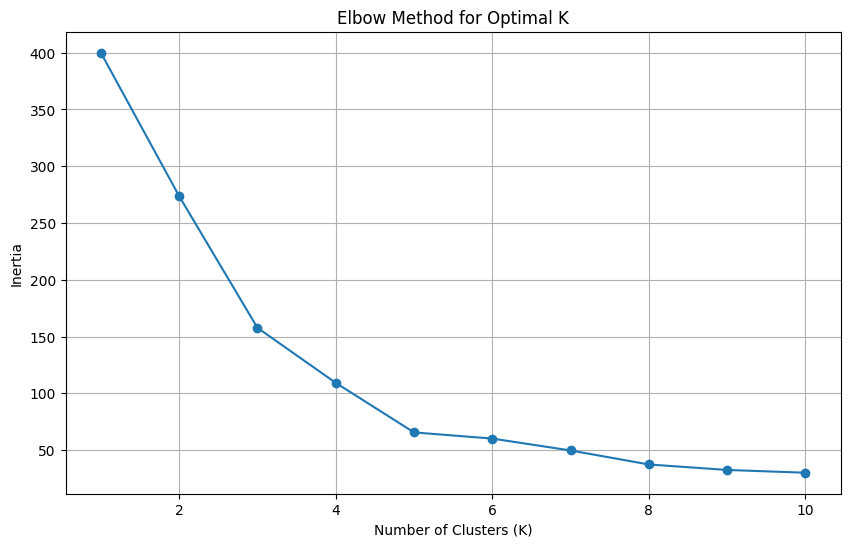

Analyze the Elbow plot to determine the optimal K value.


In [ ]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

inertia = []
k_values = range(1, 11)  # Test K from 1 to 10

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_pca[['PC1', 'PC2']])  # Fit on the principal components
    inertia.append(kmeans.inertia_)

# Plot the Elbow Method graph
plt.figure(figsize=(10, 6))
plt.plot(k_values, inertia, marker='o')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal K')
plt.grid(True)
plt.show()

# Analyze the plot to determine the elbow point
print("Analyze the Elbow plot to determine the optimal K value.")

## Data visualization

### Subtask:
Visualize the clusters using a scatter plot, color-coding the data points based on their assigned cluster labels. Also visualize the elbow method results.


**Reasoning**:
Visualize the clusters using a scatter plot and the elbow method results.



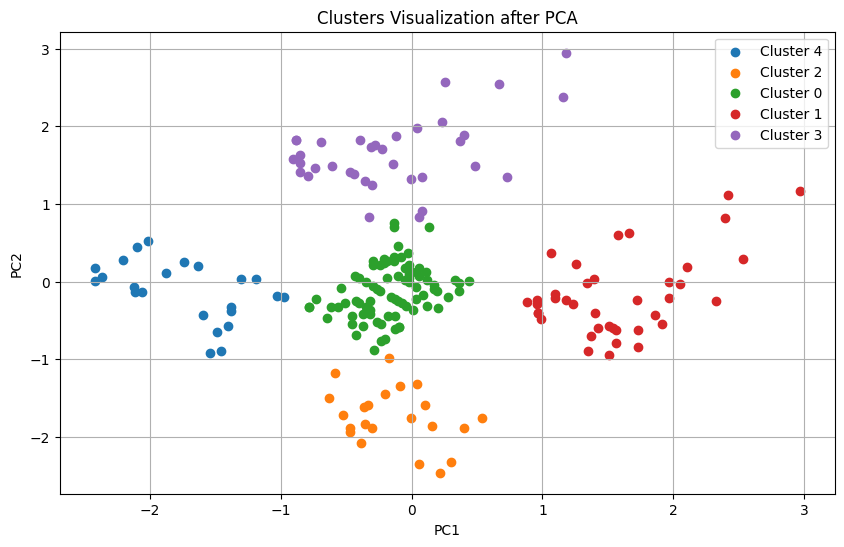

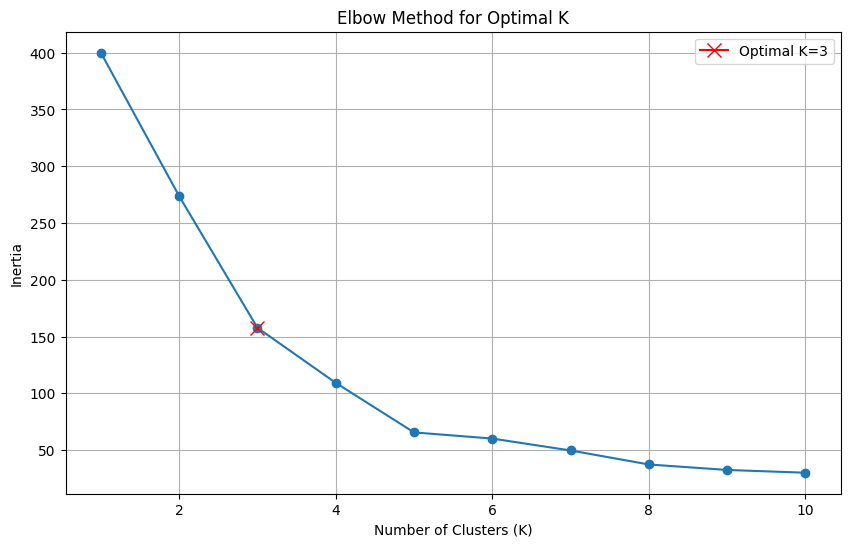

In [ ]:
import matplotlib.pyplot as plt

# Create the scatter plot
plt.figure(figsize=(10, 6))
for cluster_label in df_pca['cluster_label'].unique():
    cluster_data = df_pca[df_pca['cluster_label'] == cluster_label]
    plt.scatter(cluster_data['PC1'], cluster_data['PC2'], label=f'Cluster {cluster_label}')

plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Clusters Visualization after PCA')
plt.legend()
plt.grid(True)

# Display the scatter plot
plt.show()


# Elbow method plot (assuming inertia values are already calculated)
inertia = []
k_values = range(1, 11)
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_pca[['PC1', 'PC2']])
    inertia.append(kmeans.inertia_)
plt.figure(figsize=(10, 6))
plt.plot(k_values, inertia, marker='o')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal K')
plt.grid(True)
# Mark the optimal K (example: assuming k=3 is optimal)
plt.plot(3, inertia[2], marker='x', markersize=10, color='red', label='Optimal K=3') # example
plt.legend()
plt.show()

## Model evaluation

### Subtask:
Evaluate the quality of the clustering using the Silhouette Score.


**Reasoning**:
Calculate the silhouette score using the provided features and cluster labels.



In [ ]:
from sklearn.metrics import silhouette_score

# Calculate the silhouette score
silhouette_avg = silhouette_score(df_pca[['PC1', 'PC2']], df_pca['cluster_label'])

# Print the silhouette score
print(f"Silhouette Score: {silhouette_avg}")

Silhouette Score: 0.5546571631100179
